# Figure Generation Notebook - Tissue Piechart figure

This notebook generates a single figure, a tissue piechart figure, **tissue-piechart.pdf**.

In [1]:
suppressMessages({
    options(warn = -1) 
    library(dplyr)
})

### 1. Read in all alternatively spliced events

In [2]:
filename <- "../data/gene_as.tsv"
gene_as <- read.table(filename, header=TRUE, sep="\t",
                               skipNul=FALSE, stringsAsFactors = FALSE)
head(gene_as,2)

,GeneJunction,ASE,ASE_IDX,Tissue,counts,Display,GeneSymbol,GeneID,chr,logFC,AveExpr,t,PValue,AdjPVal,B
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,XIST-2253,A3SS,2253,adipose_subcutaneous,3,Adipose (sc),XIST,ENSG00000229807.11,chrX,-4.410265,3.196555,-35.99306,1.037929e-151,7.98686e-148,303.0562
2,XIST-2252,A3SS,2252,adipose_subcutaneous,3,Adipose (sc),XIST,ENSG00000229807.11,chrX,-2.409615,3.647928,-21.32460,1.906043e-75,7.33350e-72,152.3585


### 2. Pie chart
Show recurrent vs unique splicing events with a piechart.

Tissue specific 1 tissue
Tissue group 2-5 tissues
Recurrent > 5 tissues

In [3]:
# Colors for uniformity
# Let's use the following colors for uniformity
darkblue <- "#3c5488"
red <- "#e64b35"
nearlyblack <- "#040C04"
purple <- "#790079"
orange = "#ff9900"

In [4]:
# Count most frequent spliced genes
res <- gene_as %>% group_by(GeneSymbol) %>% count(GeneSymbol) %>% arrange(desc(n)) %>% as.data.frame()
res$GeneSymbol <- factor(res$GeneSymbol, levels = res$GeneSymbol)
length(res$GeneSymbol)

#Add number of tissues
nTissues <- rep(NA, length(res))
for (i in 1:nrow(res)) {
  df_gene <- gene_as %>% filter(GeneSymbol == res$GeneSymbol[i])
  nTissues[i] <- length(unique(df_gene$Tissue))
}
res$Tissues <- nTissues

[1] 2282

In [5]:
head(res)

,GeneSymbol,n,Tissues
,<fct>,<int>,<int>
1,XIST,229,39
2,DDX3X,70,17
3,KDM5C,44,32
4,ZFX,41,25
5,KDM6A,25,22
6,DDR1,17,2


In [6]:
#Pie chart - Number of patients with 0, 1, >1 events
counts <- c(res %>% filter(Tissues == 1) %>% count() %>% as.numeric(),
            res %>% filter(Tissues > 1 & Tissues < 6) %>% count() %>% as.numeric(),
            res %>% filter(Tissues > 5) %>% count() %>% as.numeric())

In [7]:
counts

[1] 2146  127    9

In [8]:
piecolors <- c(darkblue,red,orange)

Calculate the percentage for each category

In [9]:
counts_labels <- round(counts/sum(counts) * 100, 1)
counts_labels <- paste("(",counts_labels,")", "%", sep="")
counts_labels <- paste(counts, counts_labels,sep =" ")

png 
  2

Wrote file to ../pdf/tissue-piechart.pdf



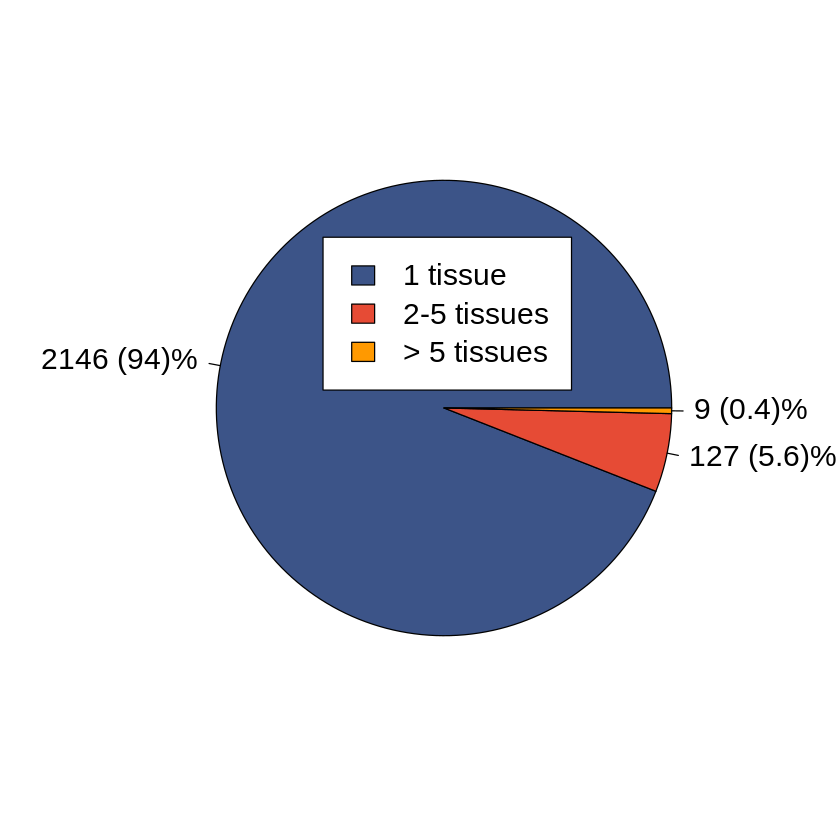

In [10]:
pdf("../pdf/tissue-piechart.pdf")
pie(counts, main="", col=piecolors, labels=counts_labels, cex=1.5)
# Create a legend at the right   
legend(-.425,0.6, c("1 tissue","2-5 tissues","> 5 tissues"), cex=1.5, 
       fill=piecolors, bg="white")
dev.off()
message("Wrote file to ../pdf/tissue-piechart.pdf")
pie(counts, main="", col=piecolors, labels=counts_labels,
    cex=1.5)
# Create a legend at the right   
legend(-.425,0.6, c("1 tissue","2-5 tissues","> 5 tissues"), cex=1.5, 
       fill=piecolors, bg="white")

### Appendix - Metadata

For replicability and reproducibility purposes, we also print the following metadata:

1. Checksums of **'artefacts'**, files generated during the analysis and stored in the folder directory **`data`**
2. List of environment metadata, dependencies, versions of libraries using `utils::sessionInfo()` and [`devtools::session_info()`](https://devtools.r-lib.org/reference/session_info.html)

### Appendix 1. Checksums with the sha256 algorithm

In [11]:
notebookid   = "create_tissue_piechart_figure"

### Appendix 2. Libraries metadata

In [12]:
dev_session_info   <- devtools::session_info()
utils_session_info <- utils::sessionInfo()

message("Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..")
saveRDS(dev_session_info, file = paste0("../metadata/", notebookid, "_devtools_session_info.rds"))
message("Done!\n")

message("Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..")
saveRDS(utils_session_info, file = paste0("../metadata/", notebookid ,"_utils_info.rds"))
message("Done!\n")

dev_session_info$platform
dev_session_info$packages[dev_session_info$packages$attached==TRUE, ]

Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..

Done!


Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..

Done!




 setting  value                       
 version  R version 3.6.1 (2019-07-05)
 os       Ubuntu 18.04.4 LTS          
 system   x86_64, linux-gnu           
 ui       X11                         
 language en_US.UTF-8                 
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       Etc/UTC                     
 date     2020-09-02                  

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
dplyr,dplyr,0.8.5,0.8.5,/opt/conda/lib/R/library/dplyr,/opt/conda/lib/R/library/dplyr,TRUE,FALSE,2020-03-07,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
repr,repr,1.1.0,1.1.0,/opt/conda/lib/R/library/repr,/opt/conda/lib/R/library/repr,TRUE,FALSE,2020-01-28,CRAN (R 3.6.3),NA,/opt/conda/lib/R/library
